Evaluation of the OI for the Shower Problem
-------------------------------------------

As an introductory example, the shower problem will be assessed. Since its initial
formulation {cite}`vinson00` it has been used thoroughly {cite}`georgakis00,gazzaneo18,gazzaneo19,gazzaneo20,lima10` in process operability research as a benchmark
to either illustrate operability concepts or test new algorithms and approaches.

The shower problem is easy to grasp but has an acceptable level of nonlinearity to be used as an illustrative example: The AIS/DIS variables corresponds to hot and cold flow rates from your shower knobs. The AOS/DOS
variables are the total flow rate of your shower and its temperature. It is desired, in general:

- A sufficient amount of flow rate for the shower
- A comfortable temperature (neither too cold nor too hot).

A simple schematic is found below:

![](shower_oi_schematic.gif)

In the most simple "variation" of the shower problem, the model (algebraic) equations that define the process model $M$ {cite}`vinson00,lima10b` are:

$$
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 * u_1+120 * u_2\right)}{\left(u_1+u_2\right)} \\
\text { if } y_1=0 \rightarrow y_2=90
\end{array}\right.
$$

With the essentials covered, let's start import opyrability's modules:

In [1]:
from opyrability import multimodel_rep, OI_eval
import numpy as np

And defining the equations for the shower problem as a function:

In [2]:
def shower_problem_2x2(u):
    y = np.zeros(2)
    y[0]=u[0]+u[1]
    if y[0]!=0:
        y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
    else:
        y[1]=(60+120)/2
        
    return y

Defining the AIS and DOS Bounds:

In [3]:
DOS_bounds =  np.array([[10, 20], 
                        [70, 100]])

AIS_bounds =  np.array([[1, 10],
                        [1, 10]])

AIS_resolution =  [5, 5]

model =  shower_problem_2x2

Then, obtaining the AOS from the AIS using the multimodel approach:

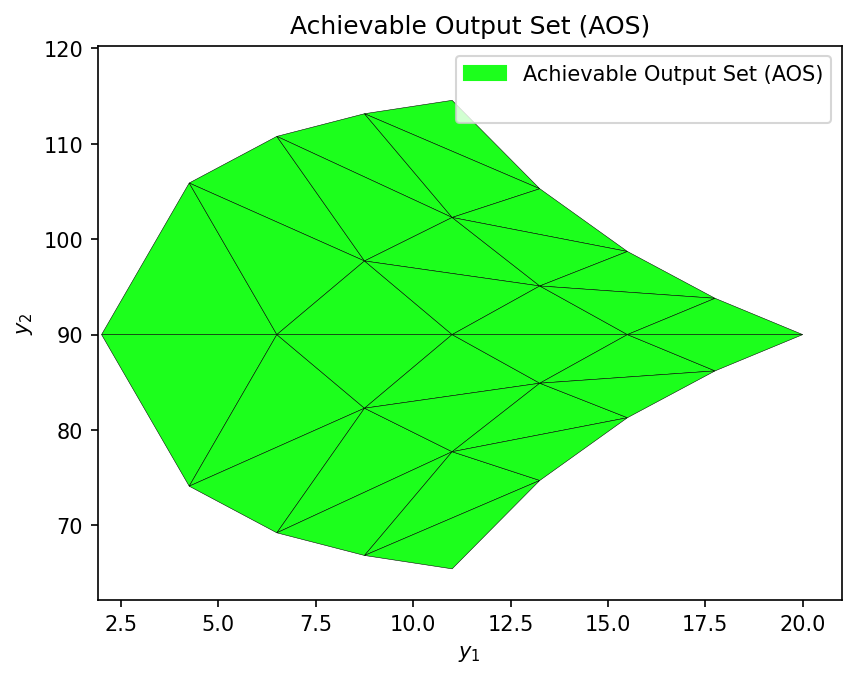

In [4]:
AOS_region  =  multimodel_rep(model, AIS_bounds, AIS_resolution)

Lastly, let's evaluate how operable the shower problem is, using the OI as a metric:

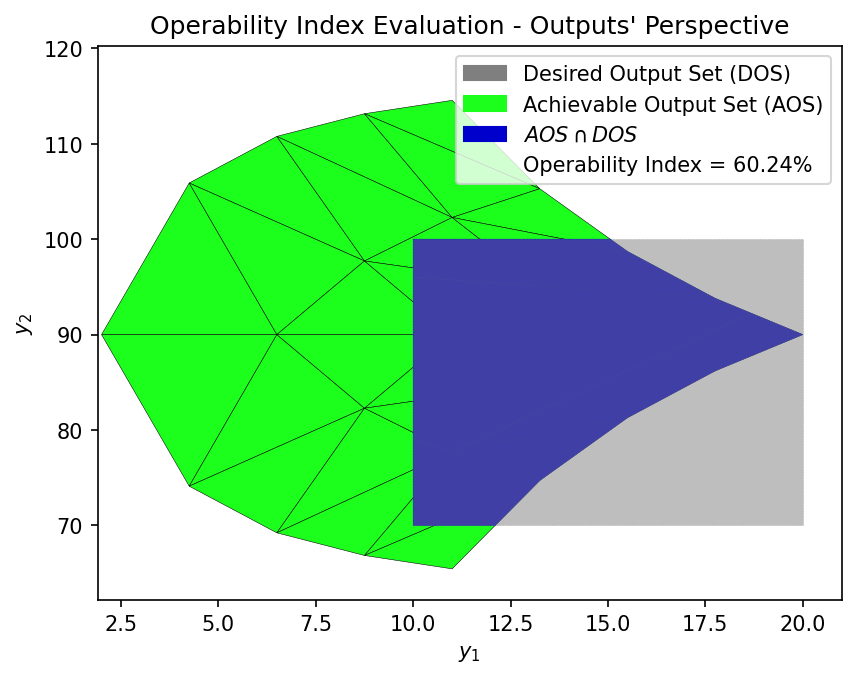

In [5]:
OI = OI_eval(AOS_region, DOS_bounds)

The OI of $60.24\%$ indicates that with the current limits of the AIS variables (hot and cold flow rates), 
the process is not fully operable!